In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)

In [7]:
def loadData(filename, delim='\t'):
    fr = open(filename)
    datasets = []
    for line in fr.readlines():
        listOfLine = line.strip().split(delim)
        listOfArray = []
        for data in listOfLine:
            listOfArray.append(float(data))
        datasets.append(listOfArray)
    return np.array(datasets).T

def pca(datasets, NumFeat):
    # center the data
    mean = np.reshape(np.mean(datasets, axis=1), (-1, 1))
    dataCentered = datasets - mean
    eigVals, eigVects = np.linalg.eig(dataCentered.dot(dataCentered.T))
    projectVect = eigVects[:, np.argsort(eigVals)[::-1][:NumFeat]]
    reduceData = projectVect.T.dot(dataCentered)
    approximateData = projectVect.dot(reduceData) + mean
    return reduceData, approximateData

def replaceNaNWithMean(datasets):
    p, n = np.shape(datasets)
    for dim in range(p):
        dataNotNan = datasets[dim][~np.isnan(datasets[dim])]  # for each dimension, figure out non-nan elments
        mean = np.mean(dataNotNan)
        datasets[dim][np.isnan(datasets[dim])] = mean  # replace all of nan values with mean
    return datasets

def pca2(datasets):
    # center the data
    mean = np.reshape(np.mean(datasets, axis=1), (-1, 1))
    dataCentered = datasets - mean
    eigVals, eigVects = np.linalg.eig(dataCentered.dot(dataCentered.T))
    eigValsSorted = eigVals[np.argsort(eigVals)[::-1]]
    return eigValsSorted

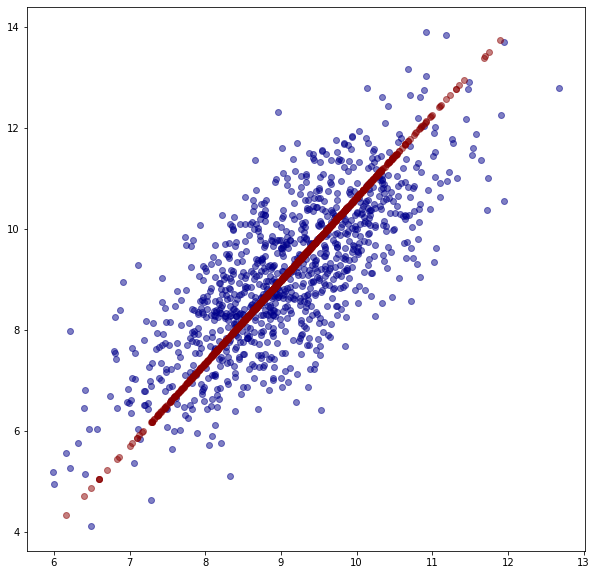

In [8]:
datasets = loadData('testSet.txt', '\t')  # 2*1000
reduceData, approximateData = pca(datasets, 1)

plt.scatter(datasets[0], datasets[1], color='darkblue', alpha=0.5)
plt.scatter(approximateData[0], approximateData[1], color='darkred', alpha=0.5)

In [9]:
secomDatasets = loadData('secom.data', ' ')  # 590*1567

pick first 6 principle dimensions


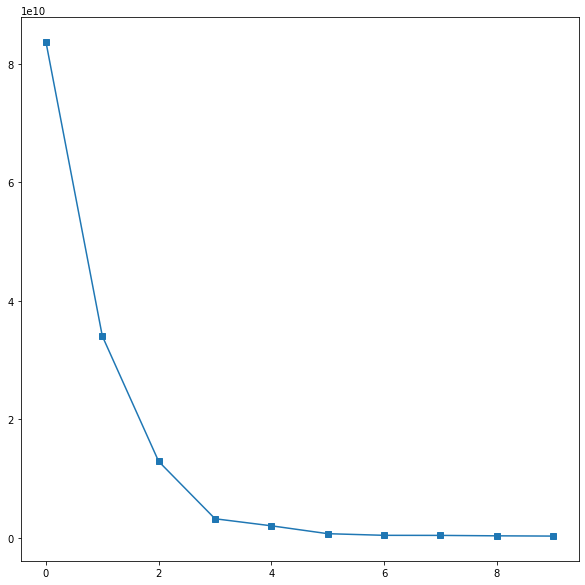

In [10]:
dataClean = replaceNaNWithMean(secomDatasets)
eigenvalues = pca2(dataClean)
x = np.arange(np.shape(eigenvalues)[0])
plt.plot(x[:10], eigenvalues[:10], marker='s')
print("pick first 6 principle dimensions")

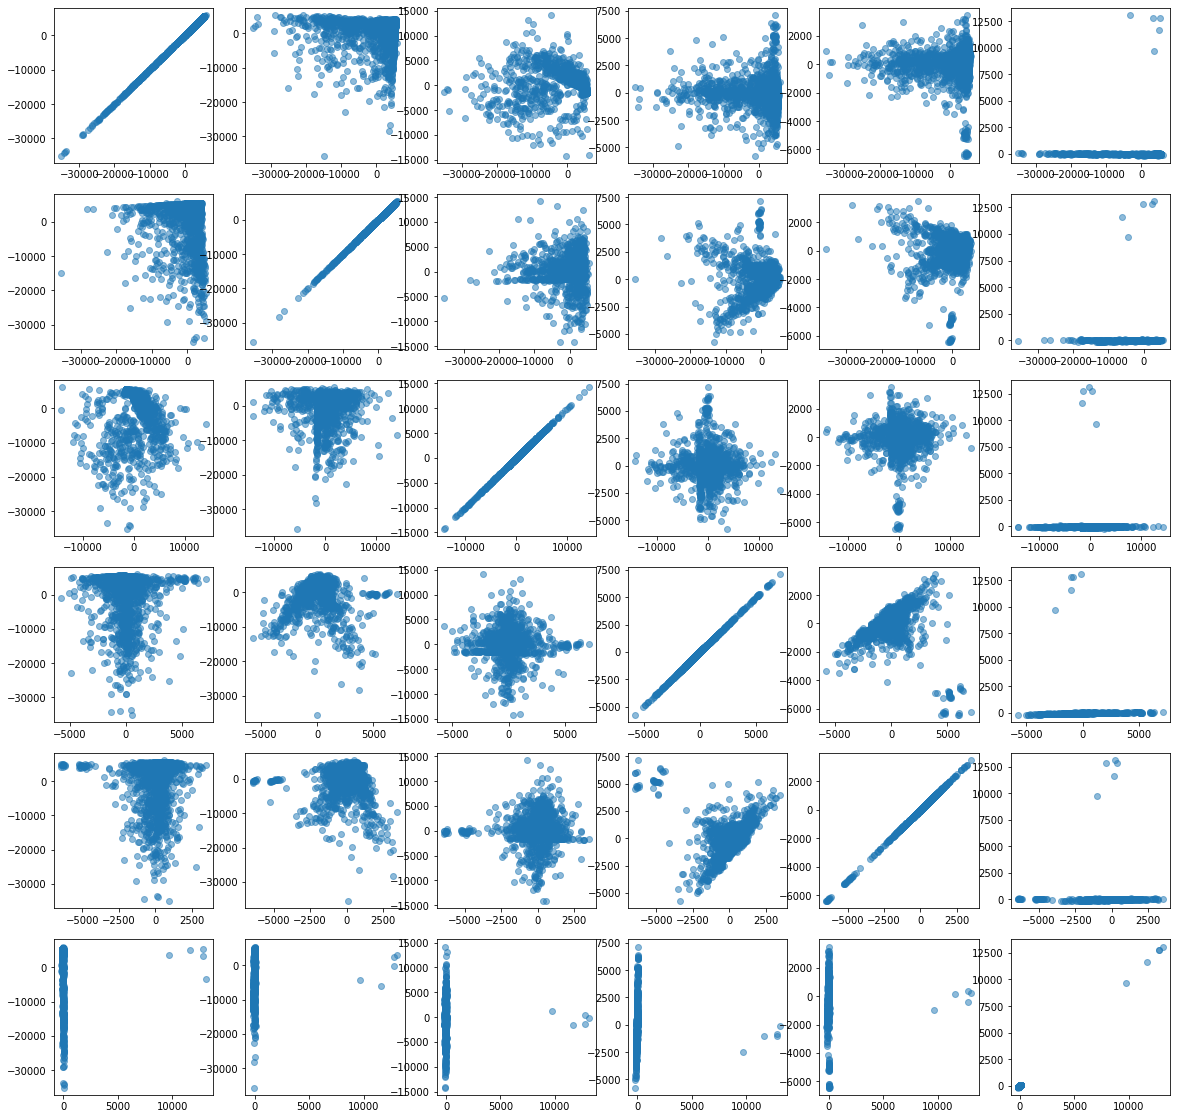

In [22]:
principleData, approximateData = pca(dataClean, 6)
plt.rcParams["figure.figsize"] = (20, 20)
fig, axes = plt.subplots(6, 6)
for i in range(6):
    for j in range(6):
        axes[i][j].scatter(principleData[i], principleData[j], alpha=0.5)